In [6]:
from __future__ import annotations
from typing import Any 

import json
import matplotlib.pyplot as plt
import pandas as pd

from premise_selection.evaluate import EvalResult, EvalData

In [7]:

PATHS = {
    #"No Coq": "/home/kthompson/coq-modeling/premise-eval/prem-select-no-coq",
    "No Coq Crossent": "/home/kthompson/coq-modeling/premise-eval/prem-select-no-coq-crossent",
    #"Coq allowed": "/home/kthompson/coq-modeling/premise-eval/prem-select",
    "Hard Premises": "/home/kthompson/coq-modeling/premise-eval/prem-select-no-coq-crossent-pos",
}

ATS = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
names: list[str] = []
recalls_list: list[list[float]] = []
for name, path in PATHS.items():
    with open(path, "r") as fin:
        eval_json_data = json.load(fin)
    eval_data = EvalData.from_json(eval_json_data)
    recalls: list[float] = []
    for k in ATS:
        recall_at_k = eval_data.recall_at(k)
        recalls.append(recall_at_k) 
    names.append(name)
    recalls_list.append(recalls)
    

Text(0.5, 1.0, 'Comparison of Loss Functions for Premise Selection')

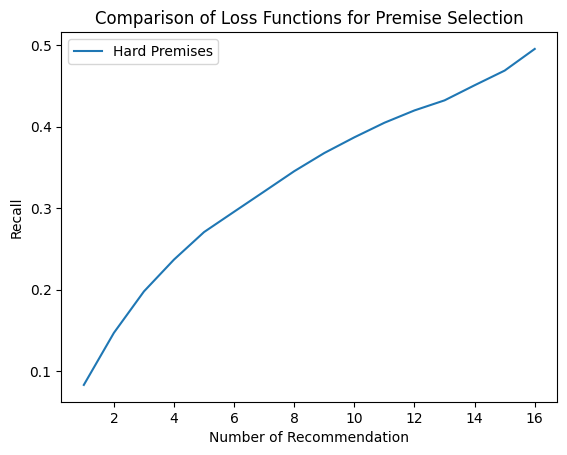

In [8]:
fig, ax = plt.subplots()
for name, recalls in zip(names, recalls_list):
    ax.plot(ATS, recalls, label=name)
ax.set_xlabel("Number of Recommendation")
ax.set_ylabel("Recall")
ax.legend()
ax.set_title("Comparison of Loss Functions for Premise Selection")



In [9]:
precisions: list[float] = []
recalls: list[float] = []
for k in ATS:
    precisions.append(eval_data.precision_at(k))
    recalls.append(eval_data.recall_at(k))

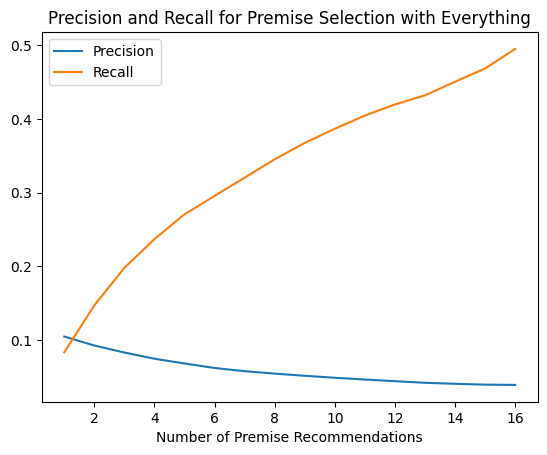

In [10]:
fig, ax = plt.subplots()
ax.plot(ATS, precisions, label="Precision")
ax.plot(ATS, recalls, label="Recall")
ax.set_xlabel("Number of Premise Recommendations")
ax.set_title("Precision and Recall for Premise Selection with Everything")
ax.legend()